In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Visualization settings
sns.set(style="whitegrid")

In [2]:
# load processed data
df = pd.read_csv("/Users/DadaOlayemi/Gaming_Habits/processed/Gaming_Habits_processed.csv")
df.head()

,Age,Gender,Occupation,Game_Type,Daily_Gaming_Hours,Weekly_Gaming_Hours,Primary_Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level,Performance_Impact
0,21,Male,Working Professional,Action,4.0,28.0,Morning,4.6,6,4,69,66,Negative
1,35,Female,Student,Sports,1.0,7.0,Night,5.4,2,7,67,72,Neutral
2,26,Male,Student,Puzzle,2.0,14.0,Morning,8.0,4,8,82,82,Positive
3,32,Male,Working Professional,Action,1.0,7.0,Night,4.9,7,7,71,66,Neutral
4,19,Male,Working Professional,Action,2.1,14.7,Morning,7.0,7,7,67,63,Neutral


In [3]:
# Summary statistics
df.describe()

,Age,Daily_Gaming_Hours,Weekly_Gaming_Hours,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,26.600000,3.320300,23.242100,6.479500,5.454000,6.065000,75.07800,75.275000
std,5.207218,1.613059,11.291414,1.155848,2.281905,2.010178,11.67494,12.058805
min,18.000000,0.500000,3.500000,4.500000,2.000000,3.000000,55.00000,50.000000
25%,22.000000,2.000000,14.000000,5.475000,3.000000,4.000000,65.00000,65.000000
50%,27.000000,3.300000,23.100000,6.500000,5.000000,6.000000,75.00000,75.000000
75%,31.000000,4.800000,33.600000,7.500000,7.000000,8.000000,85.00000,86.000000
max,35.000000,6.000000,42.000000,8.500000,9.000000,9.000000,95.00000,100.000000


In [4]:
df.describe(include='object')

,Gender,Occupation,Game_Type,Primary_Gaming_Time,Performance_Impact
count,1000,1000,1000,1000,1000
unique,2,2,6,3,3
top,Female,Student,Simulation,Morning,Neutral
freq,513,524,192,341,762


In [5]:
# frequency counts
categorical_cols = ['Gender', 'Occupation', 'Game_Type', 'Primary_Gaming_Time', 'Performance_Impact']

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for Gender:
Gender
Female    513
Male      487
Name: count, dtype: int64

Value counts for Occupation:
Occupation
Student                 524
Working Professional    476
Name: count, dtype: int64

Value counts for Game_Type:
Game_Type
Simulation    192
Action        180
Sports        161
Casual        160
Strategy      157
Puzzle        150
Name: count, dtype: int64

Value counts for Primary_Gaming_Time:
Primary_Gaming_Time
Morning    341
Evening    338
Night      321
Name: count, dtype: int64

Value counts for Performance_Impact:
Performance_Impact
Neutral     762
Negative    135
Positive    103
Name: count, dtype: int64


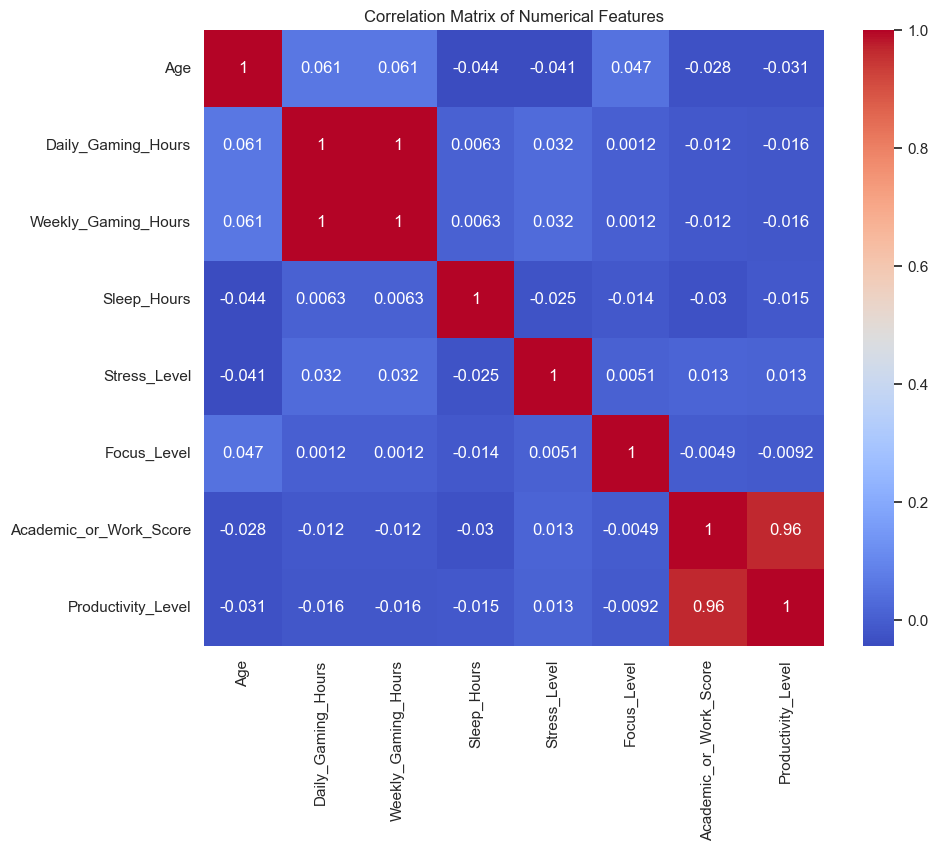

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [7]:
# groupes statistics
# Example: Average daily gaming hours by performance impact
df.groupby('Performance_Impact')['Daily_Gaming_Hours'].mean()

Performance_Impact
Negative    5.058519
Neutral     3.284646
Positive    1.305825
Name: Daily_Gaming_Hours, dtype: float64

In [8]:
# hypothesis testing
male_hours = df[df['Gender']=='Male']['Daily_Gaming_Hours']
female_hours = df[df['Gender']=='Female']['Daily_Gaming_Hours']

t_stat, p_val = stats.ttest_ind(male_hours, female_hours)
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: -1.7505490931232097
P-value: 0.08033086759383923


In [9]:
# compare means across multiple groups (ANOVA)
anova_result = stats.f_oneway(
    df[df['Game_Type']=='Action']['Productivity_Level'],
    df[df['Game_Type']=='Strategy']['Productivity_Level'],
    df[df['Game_Type']=='Casual']['Productivity_Level']
)
print("ANOVA F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

ANOVA F-statistic: 3.16145420703967
P-value: 0.043222554101734936


In [11]:
# correlation between two numerical variables
# Example: Daily gaming hours vs Sleep hours
corr, p_val = stats.pearsonr(df['Daily_Gaming_Hours'], df['Sleep_Hours'])
print("Pearson correlation:", corr)
print("P-value:", p_val)

Pearson correlation: 0.006284885773228135
P-value: 0.8426547263639643


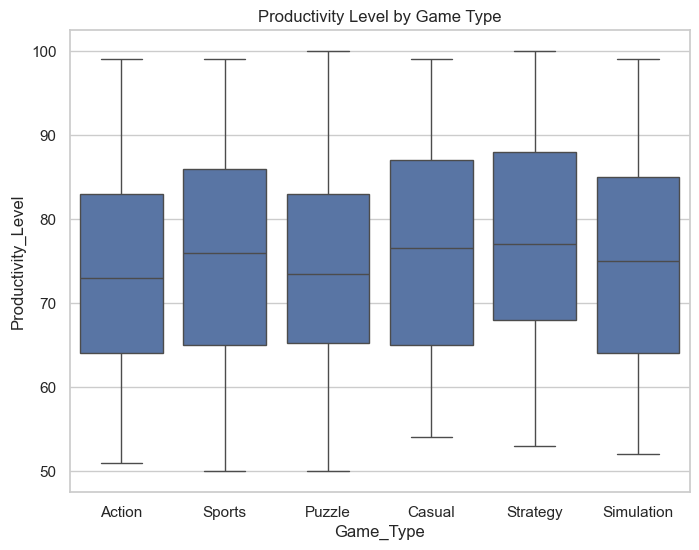

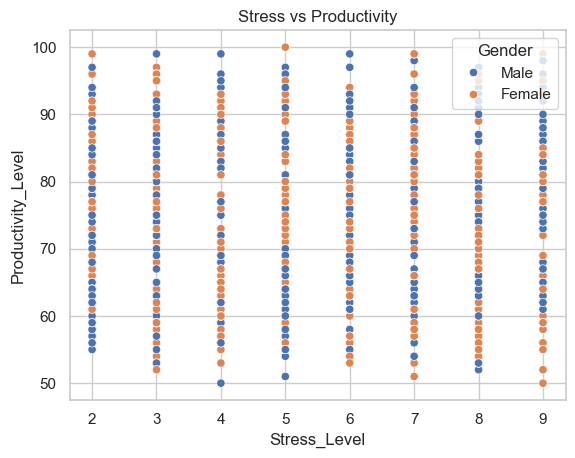

In [12]:
# visualization for statistical analysis
# Boxplot: Productivity by Game Type
plt.figure(figsize=(8,6))
sns.boxplot(x='Game_Type', y='Productivity_Level', data=df)
plt.title('Productivity Level by Game Type')
plt.show()

# Scatterplot: Stress vs Productivity
sns.scatterplot(x='Stress_Level', y='Productivity_Level', hue='Gender', data=df)
plt.title('Stress vs Productivity')
plt.show()